In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
df = pd.DataFrame(data=cancer["data"], columns=cancer["feature_names"])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler()

In [12]:
scaled_df = scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(scaled_df)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_df)

In [16]:
x_pca.shape

(569, 2)

In [17]:
scaled_df.shape

(569, 30)

In [20]:
len(x_pca[0])

2

In [21]:
x_pca[0]

array([9.19283683, 1.94858307])

In [23]:
print(x_pca[0:, 0])

[ 9.19283683  2.3878018   5.73389628  7.1229532   3.93530207  2.38024715
  2.23888331  2.1432985   3.17492429  6.35174679 -0.81041377  2.65110048
  8.18503446  0.34212591  4.34237919  4.07565618  0.23005502  4.41801092
  4.94870355 -1.23706336 -1.57816123 -3.55733637  4.73321079  4.20852421
  4.94963207  7.09856285  3.5102626   3.06405389  4.00726414  1.71530973
  6.05944551  2.9022361   4.55478269  4.99060272  2.98534079  2.76636916
  1.29619877 -3.7493134  -0.9980689   0.76526412 -2.15095347 -0.09333139
  9.08799968  0.99045377 -0.29354655  5.38094041 -4.58193667  1.70000689
 -2.13644528 -1.567479   -3.54290556 -3.15781405 -3.45048854  3.30255095
 -0.67461929 -2.85815844  4.64873887  2.17686288 -3.72145899 -4.13596294
 -2.38583566 -2.57888325  4.75911215 -2.31413225  1.69160792  1.81230541
 -2.78592476 -3.51864834  4.33000265 -3.26127947  2.70459617 -0.30785577
  5.50370532 -0.36170919 -2.62997664  1.42816759 -0.83451788  6.23089651
 11.66871465 -2.02157766 -1.63838494  1.16746161 10

In [25]:
print(x_pca[0:0])

[]


In [27]:
print(x_pca[1:2])

[[ 2.3878018  -3.76817174]]


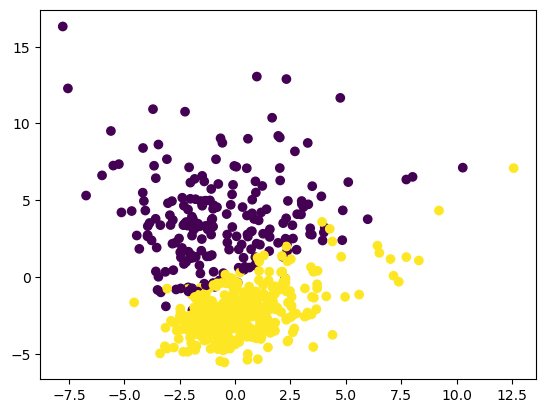

In [30]:
plt.scatter(x_pca[0:, 1], x_pca[0:, 0], c=cancer["target"])